# Project: Investigate TMDB movie dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> this dataset was taken from the movie database (TMDB), 'a community built and TV database." (www.themoviedb.org/about). Each row corresponds to movie and includes a range of data about each film. Relevant data to be used in the following analysis include the following variables:
<br>     - Original_title
<br>     - genres
<br>     - release_date
<br>     - budget_adj (budget in terms of 2010 USD)
<br>     - revenue_adj (revenue in terms of 2010 USD)
>   
> in this report, we suggested the following questions:
<br>     1- Which year has the highest release of movies?
<br>     2- How have movies budgets & revenues changed from 1960 to 2015?
<br>     3- what are the shortest and longest runtime movies?
<br>     4- what are the most 5 popular movies?
<br>     5- what are the movies of the lowest budget and revenue?
<br>     6- what are the movies of the highest budget & revenue?
<br>     7- What is the relation between budget and revenue??, so we will select the notnull records in both
<br>     8- which genres has the highest vote_count throughout the entire period?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pixiedust
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


Pixiedust database opened successfully


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head(2)

id    imdb_id  popularity     budget     revenue      original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810      Jurassic World   
1   76341  tt1392190   28.419936  150000000   378436354  Mad Max: Fury Road   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   

                        homepage         director             tagline  ...  \
0  http://www.jurassicworld.com/  Colin Trevorrow   The park is open.  ...   
1    http://www.madmaxmovie.com/    George Miller  What a Lovely Day.  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  

[2 rows x 21 columns]

In [3]:
# to display the complete data records
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df.head(1)

id    imdb_id  popularity     budget     revenue  original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810  Jurassic World   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   

                        homepage         director            tagline  \
0  http://www.jurassicworld.com/  Colin Trevorrow  The park is open.   

                                            keywords  \
0  monster|dna|tyrannosaurus rex|velociraptor|island   

                                            overview  runtime  \
0  Twenty-two years after the events of Jurassic ...      124   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15        5562   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09

### we will detect any cleanliness issues, clean it one by one instead of detecting all of them firstly and then do them all

In [5]:
# for simplification, we will start by removing all the irrelevant columns that is not going to help us in our analysis
df.drop(['id','imdb_id','homepage','tagline','keywords','overview'],axis=1,inplace=True)

In [6]:
df.head(3)

popularity     budget     revenue      original_title  \
0   32.985763  150000000  1513528810      Jurassic World   
1   28.419936  150000000   378436354  Mad Max: Fury Road   
2   13.112507  110000000   295238201           Insurgent   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   

   runtime                                     genres  \
0      124  Action|Adventure|Science Fiction|Thriller   
1      120  Action|Adventure|Science Fiction|Thriller   
2      119         Adventure|Science Fiction|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15        2480   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08

In [7]:
# we have 2 columns for the adjusted budget and revenue so no need for the first budget and revenue columns
df.drop(['budget','revenue'],axis=1,inplace=True)

In [8]:
df.head(3)

popularity      original_title  \
0   32.985763      Jurassic World   
1   28.419936  Mad Max: Fury Road   
2   13.112507           Insurgent   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   

   runtime                                     genres  \
0      124  Action|Adventure|Science Fiction|Thriller   
1      120  Action|Adventure|Science Fiction|Thriller   
2      119         Adventure|Science Fiction|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15        2480   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08

In [9]:
# extracting month in which each movie was released from the 'release_date' column
df['release_month'] = df['release_date'].str.split(pat='/').str[0]

In [10]:
df.head(3)

popularity      original_title  \
0   32.985763      Jurassic World   
1   28.419936  Mad Max: Fury Road   
2   13.112507           Insurgent   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   

   runtime                                     genres  \
0      124  Action|Adventure|Science Fiction|Thriller   
1      120  Action|Adventure|Science Fiction|Thriller   
2      119         Adventure|Science Fiction|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15        2480   

   vote_average  release_year    budget_adj   revenue_adj release_month  
0           6.5          2015  1.379999e+08  1.392446e+09             6  
1           7.1          2015  1.379999e+08  3.481613e+08             5  
2           6.3          2015  1.012000e+08  2.716190e+08             3

In [11]:
df.shape

(10866, 14)

In [12]:
df.drop('release_date',axis=1,inplace=True)

In [13]:
df.shape

(10866, 13)

In [14]:
df.head(1)

popularity  original_title  \
0   32.985763  Jurassic World   

                                                cast         director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   

   runtime                                     genres  \
0      124  Action|Adventure|Science Fiction|Thriller   

                                production_companies  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...        5562   

   vote_average  release_year    budget_adj   revenue_adj release_month  
0           6.5          2015  1.379999e+08  1.392446e+09             6

In [15]:
# rearranging dataframe column sequence
df = df[['original_title','genres','popularity','cast','director','runtime','vote_count','vote_average','release_month','release_year','production_companies','budget_adj','revenue_adj']]

In [16]:
df.head(2)

original_title                                     genres  popularity  \
0      Jurassic World  Action|Adventure|Science Fiction|Thriller   32.985763   
1  Mad Max: Fury Road  Action|Adventure|Science Fiction|Thriller   28.419936   

                                                cast         director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...    George Miller   

   runtime  vote_count  vote_average release_month  release_year  \
0      124        5562           6.5             6          2015   
1      120        6185           7.1             5          2015   

                                production_companies    budget_adj  \
0  Universal Studios|Amblin Entertainment|Legenda...  1.379999e+08   
1  Village Roadshow Pictures|Kennedy Miller Produ...  1.379999e+08   

    revenue_adj  
0  1.392446e+09  
1  3.481613e+08

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   original_title        10866 non-null  object 
 1   genres                10843 non-null  object 
 2   popularity            10866 non-null  float64
 3   cast                  10790 non-null  object 
 4   director              10822 non-null  object 
 5   runtime               10866 non-null  int64  
 6   vote_count            10866 non-null  int64  
 7   vote_average          10866 non-null  float64
 8   release_month         10866 non-null  object 
 9   release_year          10866 non-null  int64  
 10  production_companies  9836 non-null   object 
 11  budget_adj            10866 non-null  float64
 12  revenue_adj           10866 non-null  float64
dtypes: float64(4), int64(3), object(6)
memory usage: 1.1+ MB


In [18]:
def uni_movies(original_title):
    uni_movies=[]
    for movies in original_title:
        uni_movies.add(movies)
    return uni_movies

In [19]:
# checking if there is any duplicated records
df.duplicated().any()

True

In [20]:
# reviewing the duplicated records
df[df.duplicated()]

original_title                                       genres  popularity  \
2090         TEKKEN  Crime|Drama|Action|Thriller|Science Fiction     0.59643   

                                                   cast          director  \
2090  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...  Dwight H. Little   

      runtime  vote_count  vote_average release_month  release_year  \
2090       92         110           5.0             3          2010   

        production_companies  budget_adj  revenue_adj  
2090  Namco|Light Song Films  30000000.0     967000.0

In [21]:
# reviewing the only duplicated record
df[df['original_title']=='TEKKEN']

original_title                                       genres  popularity  \
2089         TEKKEN  Crime|Drama|Action|Thriller|Science Fiction     0.59643   
2090         TEKKEN  Crime|Drama|Action|Thriller|Science Fiction     0.59643   

                                                   cast          director  \
2089  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...  Dwight H. Little   
2090  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...  Dwight H. Little   

      runtime  vote_count  vote_average release_month  release_year  \
2089       92         110           5.0             3          2010   
2090       92         110           5.0             3          2010   

        production_companies  budget_adj  revenue_adj  
2089  Namco|Light Song Films  30000000.0     967000.0  
2090  Namco|Light Song Films  30000000.0     967000.0

In [22]:
# choosing on of them to drop
df = df.drop([df.index[2090]])

In [23]:
# checking the duplication again
df.duplicated().any()

False

In [24]:
df.shape

(10865, 13)

### we now want to check if there are any zeros in the records to change them to np.nan

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   original_title        10865 non-null  object 
 1   genres                10842 non-null  object 
 2   popularity            10865 non-null  float64
 3   cast                  10789 non-null  object 
 4   director              10821 non-null  object 
 5   runtime               10865 non-null  int64  
 6   vote_count            10865 non-null  int64  
 7   vote_average          10865 non-null  float64
 8   release_month         10865 non-null  object 
 9   release_year          10865 non-null  int64  
 10  production_companies  9835 non-null   object 
 11  budget_adj            10865 non-null  float64
 12  revenue_adj           10865 non-null  float64
dtypes: float64(4), int64(3), object(6)
memory usage: 1.2+ MB


In [26]:
# checking column having zeros
df.isin([0]).any()

original_title          False
genres                  False
popularity              False
cast                    False
director                False
runtime                  True
vote_count              False
vote_average            False
release_month           False
release_year            False
production_companies    False
budget_adj               True
revenue_adj              True
dtype: bool

In [27]:
# changing all zeros in the 3 columns (runtime,budget_adj,revenue_adj) into np.nan
df['runtime']=df['runtime'].replace(0, np.nan)
df['budget_adj']=df['budget_adj'].replace(0, np.nan)
df['revenue_adj']=df['revenue_adj'].replace(0, np.nan)

In [28]:
# checking again column having zeros
df.isin([0]).any()

original_title          False
genres                  False
popularity              False
cast                    False
director                False
runtime                 False
vote_count              False
vote_average            False
release_month           False
release_year            False
production_companies    False
budget_adj              False
revenue_adj             False
dtype: bool

In [29]:
# info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   original_title        10865 non-null  object 
 1   genres                10842 non-null  object 
 2   popularity            10865 non-null  float64
 3   cast                  10789 non-null  object 
 4   director              10821 non-null  object 
 5   runtime               10834 non-null  float64
 6   vote_count            10865 non-null  int64  
 7   vote_average          10865 non-null  float64
 8   release_month         10865 non-null  object 
 9   release_year          10865 non-null  int64  
 10  production_companies  9835 non-null   object 
 11  budget_adj            5169 non-null   float64
 12  revenue_adj           4849 non-null   float64
dtypes: float64(5), int64(2), object(6)
memory usage: 1.2+ MB


In [30]:
df.head(3)

original_title                                     genres  popularity  \
0      Jurassic World  Action|Adventure|Science Fiction|Thriller   32.985763   
1  Mad Max: Fury Road  Action|Adventure|Science Fiction|Thriller   28.419936   
2           Insurgent         Adventure|Science Fiction|Thriller   13.112507   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   

   runtime  vote_count  vote_average release_month  release_year  \
0    124.0        5562           6.5             6          2015   
1    120.0        6185           7.1             5          2015   
2    119.0        2480           6.3             3          2015   

                                production_companies    budget_adj  \
0  Universal Studios|Amblin Entertainment|Legenda...  1.379999e+08   
1  Village Roadshow Pictures|Kennedy Miller Produ...  1.379999e+08   
2  Summit Entertainment|Mandeville Films|Red Wago...  1.012000e+08   

    revenue_adj  
0  1.392446e+09  
1  3.481613e+08  
2  2.716190e+08

In [31]:
df.describe()

popularity       runtime    vote_count  vote_average  release_year  \
count  10865.000000  10834.000000  10865.000000  10865.000000  10865.000000   
mean       0.646446    102.363855    217.399632      5.975012   2001.321859   
std        1.000231     30.948225    575.644627      0.935138     12.813260   
min        0.000065      2.000000     10.000000      1.500000   1960.000000   
25%        0.207575     90.000000     17.000000      5.400000   1995.000000   
50%        0.383831     99.000000     38.000000      6.000000   2006.000000   
75%        0.713857    112.000000    146.000000      6.600000   2011.000000   
max       32.985763    900.000000   9767.000000      9.200000   2015.000000   

         budget_adj   revenue_adj  
count  5.169000e+03  4.849000e+03  
mean   3.688907e+07  1.151009e+08  
std    4.196096e+07  1.988557e+08  
min    9.210911e-01  2.370705e+00  
25%    8.102293e+06  1.046585e+07  
50%    2.271505e+07  4.395666e+07  
75%    5.008384e+07  1.316482e+08  
max    4.250000e+08  2.827124e+09

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   original_title        10865 non-null  object 
 1   genres                10842 non-null  object 
 2   popularity            10865 non-null  float64
 3   cast                  10789 non-null  object 
 4   director              10821 non-null  object 
 5   runtime               10834 non-null  float64
 6   vote_count            10865 non-null  int64  
 7   vote_average          10865 non-null  float64
 8   release_month         10865 non-null  object 
 9   release_year          10865 non-null  int64  
 10  production_companies  9835 non-null   object 
 11  budget_adj            5169 non-null   float64
 12  revenue_adj           4849 non-null   float64
dtypes: float64(5), int64(2), object(6)
memory usage: 1.2+ MB


In [33]:
df.runtime.sort_values(ascending=False)

3894     900.0
4041     877.0
2722     705.0
6176     566.0
6181     561.0
6894     550.0
2214     540.0
3356     501.0
1865     500.0
3141     470.0
2170     421.0
8766     417.0
2843     400.0
6008     400.0
4788     389.0
9300     372.0
4198     366.0
4939     360.0
7256     360.0
5121     352.0
2107     338.0
3886     336.0
415      300.0
8173     300.0
7267     294.0
8768     292.0
1235     285.0
1183     282.0
5330     273.0
4306     273.0
7608     270.0
6829     270.0
2630     257.0
10304    254.0
4098     254.0
4864     252.0
4030     250.0
5163     248.0
10443    248.0
3826     247.0
559      246.0
8573     242.0
609      240.0
6453     240.0
2393     240.0
3772     240.0
1678     240.0
1802     240.0
9346     236.0
4164     235.0
989      233.0
9666     230.0
7888     229.0
4084     226.0
8221     225.0
10674    225.0
4174     224.0
6481     223.0
4547     220.0
7332     219.0
9850     216.0
5065     214.0
3110     213.0
1077     210.0
9867     208.0
6477     208.0
10172    2

In [34]:
# checking how may a movie duration extend to 900 min
df[df['runtime']==900]
# it was figured out that it is a documentry

original_title       genres  popularity  \
3894  The Story of Film: An Odyssey  Documentary    0.006925   

                                                   cast      director  \
3894  Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...  Mark Cousins   

      runtime  vote_count  vote_average release_month  release_year  \
3894    900.0          14           9.2             9          2011   

     production_companies  budget_adj  revenue_adj  
3894                  NaN         NaN          NaN

In [35]:
# changing type of column release_year to object
df['release_year']= df['release_year'].astype(str)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   original_title        10865 non-null  object 
 1   genres                10842 non-null  object 
 2   popularity            10865 non-null  float64
 3   cast                  10789 non-null  object 
 4   director              10821 non-null  object 
 5   runtime               10834 non-null  float64
 6   vote_count            10865 non-null  int64  
 7   vote_average          10865 non-null  float64
 8   release_month         10865 non-null  object 
 9   release_year          10865 non-null  object 
 10  production_companies  9835 non-null   object 
 11  budget_adj            5169 non-null   float64
 12  revenue_adj           4849 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 1.2+ MB


In [37]:
# checking records in which genres has NaN values
df[df.genres.isnull()].head(3)

original_title genres  popularity  \
424                        Belli di papÃ     NaN    0.244648   
620                    All Hallows' Eve 2    NaN    0.129696   
997  Star Wars Rebels: Spark of Rebellion    NaN    0.330431   

                                                  cast  \
424  Diego Abatantuono|Matilde Gioli|Andrea Pisani|...   
620                                                NaN   
997  Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...   

                                              director  runtime  vote_count  \
424                                       Guido Chiesa    100.0          21   
620  Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...     90.0          13   
997                          Steward Lee|Steven G. Lee     44.0          13   

     vote_average release_month release_year  \
424           6.1            10         2015   
620           5.0            10         2015   
997           6.8            10         2014   

                   production_companies  budget_adj  revenue_adj  
424                                 NaN         NaN          NaN  
620  Ruthless Pictures|Hollywood Shorts         NaN          NaN  
997                                 NaN         NaN          NaN

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   original_title        10865 non-null  object 
 1   genres                10842 non-null  object 
 2   popularity            10865 non-null  float64
 3   cast                  10789 non-null  object 
 4   director              10821 non-null  object 
 5   runtime               10834 non-null  float64
 6   vote_count            10865 non-null  int64  
 7   vote_average          10865 non-null  float64
 8   release_month         10865 non-null  object 
 9   release_year          10865 non-null  object 
 10  production_companies  9835 non-null   object 
 11  budget_adj            5169 non-null   float64
 12  revenue_adj           4849 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 1.2+ MB


In [39]:
df.head(3)

original_title                                     genres  popularity  \
0      Jurassic World  Action|Adventure|Science Fiction|Thriller   32.985763   
1  Mad Max: Fury Road  Action|Adventure|Science Fiction|Thriller   28.419936   
2           Insurgent         Adventure|Science Fiction|Thriller   13.112507   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   

   runtime  vote_count  vote_average release_month release_year  \
0    124.0        5562           6.5             6         2015   
1    120.0        6185           7.1             5         2015   
2    119.0        2480           6.3             3         2015   

                                production_companies    budget_adj  \
0  Universal Studios|Amblin Entertainment|Legenda...  1.379999e+08   
1  Village Roadshow Pictures|Kennedy Miller Produ...  1.379999e+08   
2  Summit Entertainment|Mandeville Films|Red Wago...  1.012000e+08   

    revenue_adj  
0  1.392446e+09  
1  3.481613e+08  
2  2.716190e+08

<a id='eda'></a>
# Exploratory Data Analysis

## Which year has the highest release of movies?

In [40]:
# number of movies per each year from 1960-2015
df.groupby('release_year').count()['original_title'].sort_values(ascending=False)

release_year
2014    700
2013    659
2015    629
2012    588
2011    540
2009    533
2008    496
2010    489
2007    438
2006    408
2005    364
2004    307
2003    281
2002    266
2001    242
2000    227
1999    224
1998    210
1996    204
1997    192
1994    184
1993    178
1995    175
1988    145
1989    137
1991    133
1992    133
1990    132
1987    125
1986    121
1985    109
1984    105
1981     82
1982     81
1983     80
1980     78
1978     65
1979     57
1977     57
1971     55
1973     55
1974     47
1976     47
1966     46
1975     44
1964     42
1970     41
1972     40
1967     40
1968     39
1965     35
1963     34
1962     32
1960     32
1961     31
1969     31
Name: original_title, dtype: int64

Text(0, 0.5, 'movie_count')

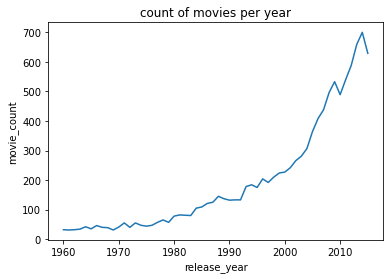

In [41]:
# plotting number of movies from 1960 through 2015
df.groupby('release_year').count()['original_title'].plot.line(title='count of movies per year')
plt.xlabel('release_year')
plt.ylabel('movie_count')

### the previous chart shows how movies counts increased from 1960-2015

In [42]:
df.head(3)

original_title                                     genres  popularity  \
0      Jurassic World  Action|Adventure|Science Fiction|Thriller   32.985763   
1  Mad Max: Fury Road  Action|Adventure|Science Fiction|Thriller   28.419936   
2           Insurgent         Adventure|Science Fiction|Thriller   13.112507   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   

   runtime  vote_count  vote_average release_month release_year  \
0    124.0        5562           6.5             6         2015   
1    120.0        6185           7.1             5         2015   
2    119.0        2480           6.3             3         2015   

                                production_companies    budget_adj  \
0  Universal Studios|Amblin Entertainment|Legenda...  1.379999e+08   
1  Village Roadshow Pictures|Kennedy Miller Produ...  1.379999e+08   
2  Summit Entertainment|Mandeville Films|Red Wago...  1.012000e+08   

    revenue_adj  
0  1.392446e+09  
1  3.481613e+08  
2  2.716190e+08

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   original_title        10865 non-null  object 
 1   genres                10842 non-null  object 
 2   popularity            10865 non-null  float64
 3   cast                  10789 non-null  object 
 4   director              10821 non-null  object 
 5   runtime               10834 non-null  float64
 6   vote_count            10865 non-null  int64  
 7   vote_average          10865 non-null  float64
 8   release_month         10865 non-null  object 
 9   release_year          10865 non-null  object 
 10  production_companies  9835 non-null   object 
 11  budget_adj            5169 non-null   float64
 12  revenue_adj           4849 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 1.2+ MB


## How have movies budgets & revenues changed from 1960 to 2015

In [44]:
# fluctuations of budget_adj through the whole period 1960-2015
df.groupby('release_year').sum()['budget_adj'].sort_values(ascending=False)

release_year
2010    9.355001e+09
2011    8.742180e+09
2009    8.735031e+09
2013    8.645240e+09
2004    8.277766e+09
2005    8.199242e+09
2007    8.030088e+09
2006    7.902875e+09
2008    7.880759e+09
2012    7.858264e+09
1999    7.546997e+09
2003    7.396432e+09
2014    7.298716e+09
2000    7.284599e+09
2002    7.145845e+09
2015    6.988821e+09
2001    6.947987e+09
1997    6.454163e+09
1998    6.019175e+09
1996    5.125788e+09
1995    4.100986e+09
1994    3.279412e+09
1993    2.686296e+09
1991    2.347575e+09
1992    2.240538e+09
1990    2.152749e+09
1989    1.899099e+09
1988    1.706241e+09
1984    1.530647e+09
1985    1.517781e+09
1986    1.401604e+09
1987    1.361503e+09
1983    1.136488e+09
1982    9.892602e+08
1980    9.591883e+08
1981    8.963425e+08
1979    7.656024e+08
1970    7.130931e+08
1978    6.986145e+08
1967    6.579397e+08
1977    5.813295e+08
1963    5.221334e+08
1965    4.858590e+08
1976    4.680419e+08
1968    4.509830e+08
1971    4.092587e+08
1962    3.944616e+08


In [45]:
# fluctuations of revenue_adj through the whole perios 1960-2015
df.groupby('release_year').sum()['revenue_adj'].sort_values(ascending=False)

release_year
2015    2.462144e+10
2012    2.342870e+10
2013    2.312342e+10
2011    2.297046e+10
2009    2.254393e+10
2014    2.241120e+10
2010    2.195903e+10
2007    2.041464e+10
2008    1.968016e+10
2004    1.938755e+10
2005    1.844209e+10
2003    1.794416e+10
2002    1.775189e+10
2006    1.760497e+10
2001    1.651436e+10
1999    1.486523e+10
1997    1.447463e+10
2000    1.390224e+10
1995    1.310242e+10
1998    1.269898e+10
1996    1.155478e+10
1993    1.049859e+10
1994    1.043817e+10
1992    9.445598e+09
1989    9.085023e+09
1990    8.870474e+09
1977    7.845261e+09
1991    7.535703e+09
1988    6.895324e+09
1987    6.644058e+09
1973    6.011167e+09
1986    5.973746e+09
1985    5.829668e+09
1982    5.555204e+09
1984    5.532077e+09
1979    5.062057e+09
1983    5.051902e+09
1967    4.823051e+09
1980    4.679946e+09
1978    4.578763e+09
1981    4.255844e+09
1975    3.879578e+09
1974    3.593282e+09
1965    3.170185e+09
1970    3.146413e+09
1976    3.069212e+09
1972    2.579801e+09


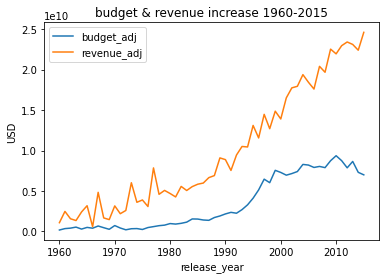

In [46]:
# plotting the fluctuations happened in the movies budget & revenues through the entire period
df.groupby('release_year').sum()['budget_adj'].plot.line(title='budget & revenue increase 1960-2015')
df.groupby('release_year').sum()['revenue_adj'].plot.line(title='budget & revenue increase 1960-2015')
plt.xlabel('release_year')
plt.ylabel('USD')
plt.legend()

### the previous chart shows how budget and revenues increases through the period, we can see how revenues increases significantly

In [47]:
df.head(3)

original_title                                     genres  popularity  \
0      Jurassic World  Action|Adventure|Science Fiction|Thriller   32.985763   
1  Mad Max: Fury Road  Action|Adventure|Science Fiction|Thriller   28.419936   
2           Insurgent         Adventure|Science Fiction|Thriller   13.112507   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   

   runtime  vote_count  vote_average release_month release_year  \
0    124.0        5562           6.5             6         2015   
1    120.0        6185           7.1             5         2015   
2    119.0        2480           6.3             3         2015   

                                production_companies    budget_adj  \
0  Universal Studios|Amblin Entertainment|Legenda...  1.379999e+08   
1  Village Roadshow Pictures|Kennedy Miller Produ...  1.379999e+08   
2  Summit Entertainment|Mandeville Films|Red Wago...  1.012000e+08   

    revenue_adj  
0  1.392446e+09  
1  3.481613e+08  
2  2.716190e+08

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   original_title        10865 non-null  object 
 1   genres                10842 non-null  object 
 2   popularity            10865 non-null  float64
 3   cast                  10789 non-null  object 
 4   director              10821 non-null  object 
 5   runtime               10834 non-null  float64
 6   vote_count            10865 non-null  int64  
 7   vote_average          10865 non-null  float64
 8   release_month         10865 non-null  object 
 9   release_year          10865 non-null  object 
 10  production_companies  9835 non-null   object 
 11  budget_adj            5169 non-null   float64
 12  revenue_adj           4849 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 1.2+ MB


## what are the shortest and longest runtime movies?

In [49]:
df.head(2)

original_title                                     genres  popularity  \
0      Jurassic World  Action|Adventure|Science Fiction|Thriller   32.985763   
1  Mad Max: Fury Road  Action|Adventure|Science Fiction|Thriller   28.419936   

                                                cast         director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...    George Miller   

   runtime  vote_count  vote_average release_month release_year  \
0    124.0        5562           6.5             6         2015   
1    120.0        6185           7.1             5         2015   

                                production_companies    budget_adj  \
0  Universal Studios|Amblin Entertainment|Legenda...  1.379999e+08   
1  Village Roadshow Pictures|Kennedy Miller Produ...  1.379999e+08   

    revenue_adj  
0  1.392446e+09  
1  3.481613e+08

In [50]:
# the shortest runtime movie
df.runtime.min()

2.0

In [51]:
# names of the shortest runtime movies
shortest_movies = [df[df['runtime']==2]['original_title']]
shortest_movies

[4883                           Fresh Guacamole
 4890                Cousin Ben Troop Screening
 7905     The Adventures of AndrÃ© and Wally B.
 10550                                 Luxo Jr.
 10754                     Bambi Meets Godzilla
 Name: original_title, dtype: object]

In [52]:
# the longest runtime movie
df.runtime.max()

900.0

In [53]:
# names of the longest runtime movies
longest_movies = [df[df['runtime']==900]['original_title']]
longest_movies

[3894    The Story of Film: An Odyssey
 Name: original_title, dtype: object]

## what are the most 5 popular movies?

In [54]:
# the most 5 popular movies according to the popularity given by TMDB
df.nlargest(5,'popularity')

original_title                                     genres  \
0             Jurassic World  Action|Adventure|Science Fiction|Thriller   
1         Mad Max: Fury Road  Action|Adventure|Science Fiction|Thriller   
629             Interstellar            Adventure|Drama|Science Fiction   
630  Guardians of the Galaxy           Action|Science Fiction|Adventure   
2                  Insurgent         Adventure|Science Fiction|Thriller   

     popularity                                               cast  \
0     32.985763  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1     28.419936  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
629   24.949134  Matthew McConaughey|Jessica Chastain|Anne Hath...   
630   14.311205  Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...   
2     13.112507  Shailene Woodley|Theo James|Kate Winslet|Ansel...   

              director  runtime  vote_count  vote_average release_month  \
0      Colin Trevorrow    124.0        5562           6.5             6   
1        George Miller    120.0        6185           7.1             5   
629  Christopher Nolan    169.0        6498           8.0            11   
630         James Gunn    121.0        5612           7.9             7   
2     Robert Schwentke    119.0        2480           6.3             3   

    release_year                               production_companies  \
0           2015  Universal Studios|Amblin Entertainment|Legenda...   
1           2015  Village Roadshow Pictures|Kennedy Miller Produ...   
629         2014  Paramount Pictures|Legendary Pictures|Warner B...   
630         2014  Marvel Studios|Moving Picture Company (MPC)|Bu...   
2           2015  Summit Entertainment|Mandeville Films|Red Wago...   

       budget_adj   revenue_adj  
0    1.379999e+08  1.392446e+09  
1    1.379999e+08  3.481613e+08  
629  1.519800e+08  5.726906e+08  
630  1.565855e+08  7.122911e+08  
2    1.012000e+08  2.716190e+08

### the previous table shows the most popular movies according to the popularity

## what are the movies of the lowest budget and revenue

In [55]:
# lowest budget 
df.budget_adj.min()

0.921091050771459

In [56]:
# movie of the lowest budget
df[df['budget_adj']==0.921091050771459]['original_title']

1151    Fear Clinic
Name: original_title, dtype: object

In [57]:
# lowest revenue
df.revenue_adj.min()

2.37070528956505

In [58]:
# movie of the lowest revenue
df[df['revenue_adj']==2.37070528956505]['original_title']

5067    Shattered Glass
Name: original_title, dtype: object

## what are the movies of the highest budget & revenue?

In [59]:
# highest budget
df.budget_adj.max()

425000000.0

In [60]:
# movie of the highest budget
df[df['budget_adj']==425000000]['original_title']

2244    The Warrior's Way
Name: original_title, dtype: object

In [61]:
# highest revenue
df.revenue_adj.max()

2827123750.41189

In [62]:
# movie of the highest revenue
df[df['revenue_adj']==2827123750.41189]['original_title']

1386    Avatar
Name: original_title, dtype: object

In [63]:
df.head(3)

original_title                                     genres  popularity  \
0      Jurassic World  Action|Adventure|Science Fiction|Thriller   32.985763   
1  Mad Max: Fury Road  Action|Adventure|Science Fiction|Thriller   28.419936   
2           Insurgent         Adventure|Science Fiction|Thriller   13.112507   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   

   runtime  vote_count  vote_average release_month release_year  \
0    124.0        5562           6.5             6         2015   
1    120.0        6185           7.1             5         2015   
2    119.0        2480           6.3             3         2015   

                                production_companies    budget_adj  \
0  Universal Studios|Amblin Entertainment|Legenda...  1.379999e+08   
1  Village Roadshow Pictures|Kennedy Miller Produ...  1.379999e+08   
2  Summit Entertainment|Mandeville Films|Red Wago...  1.012000e+08   

    revenue_adj  
0  1.392446e+09  
1  3.481613e+08  
2  2.716190e+08

## What is the relation between budget and revenue??, so we will select the notnull records in both

In [64]:
# subset of the dataframe that has values in budget and revenues columns
df[df.budget_adj.notnull() & df.revenue_adj.notnull()]

original_title  \
0                                         Jurassic World   
1                                     Mad Max: Fury Road   
2                                              Insurgent   
3                           Star Wars: The Force Awakens   
4                                              Furious 7   
5                                           The Revenant   
6                                     Terminator Genisys   
7                                            The Martian   
8                                                Minions   
9                                             Inside Out   
10                                               Spectre   
11                                     Jupiter Ascending   
12                                            Ex Machina   
13                                                Pixels   
14                               Avengers: Age of Ultron   
15                                     The Hateful Eight   
16                                               Taken 3   
17                                               Ant-Man   
18                                            Cinderella   
19                 The Hunger Games: Mockingjay - Part 2   
20                                          Tomorrowland   
21                                              Southpaw   
22                                           San Andreas   
23                                  Fifty Shades of Grey   
24                                         The Big Short   
25                    Mission: Impossible - Rogue Nation   
26                                                 Ted 2   
27                          Kingsman: The Secret Service   
28                                             Spotlight   
29                        Maze Runner: The Scorch Trials   
31                                               Chappie   
32                                       Pitch Perfect 2   
33                                       Bridge of Spies   
34                                            Goosebumps   
35                                                  Room   
37                                     The Good Dinosaur   
38                                         Run All Night   
39                                              Brooklyn   
40                                Straight Outta Compton   
41                                 The Last Witch Hunter   
42                                            Steve Jobs   
43                               The Man from U.N.C.L.E.   
44                                    The Age of Adaline   
45                                        Hardcore Henry   
46                                                  Home   
47                                           Paper Towns   
49                                           The Lobster   
50                                                 Carol   
51                                            The Intern   
52                                               Everest   
53                                                   Joy   
54                                           Point Break   
55                                                 Burnt   
56                                             Self/less   
57                                             Mortdecai   
58                                       The Danish Girl   
59                                              Blackhat   
60                                               Sicario   
61                                        Fantastic Four   
62                                             The Witch   
63                                                   Spy   
64                                                 Focus   
65                                      Hitman: Agent 47   
66                               In the Heart of the Sea   
68                                                 Creed   
69                                            Trainwreck   
70                    

<AxesSubplot:title={'center':'budget vs revenue'}, xlabel='budget_adj', ylabel='revenue_adj'>

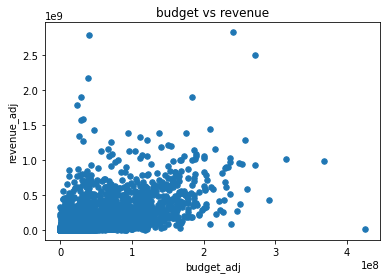

In [65]:
# plotting the relation between both the budget and the revenue
df[df.budget_adj.notnull() & df.revenue_adj.notnull()].plot(kind='scatter', x='budget_adj', y='revenue_adj', s=30,title='budget vs revenue')

### the previous chart shows the relation between budget and revenue deduced from the budgets and revenues of the movies given in our dataset
### we can see that the relation is directly proportional but the relation cannot be considered strong enough

In [66]:
df.head(3)

original_title                                     genres  popularity  \
0      Jurassic World  Action|Adventure|Science Fiction|Thriller   32.985763   
1  Mad Max: Fury Road  Action|Adventure|Science Fiction|Thriller   28.419936   
2           Insurgent         Adventure|Science Fiction|Thriller   13.112507   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   

   runtime  vote_count  vote_average release_month release_year  \
0    124.0        5562           6.5             6         2015   
1    120.0        6185           7.1             5         2015   
2    119.0        2480           6.3             3         2015   

                                production_companies    budget_adj  \
0  Universal Studios|Amblin Entertainment|Legenda...  1.379999e+08   
1  Village Roadshow Pictures|Kennedy Miller Produ...  1.379999e+08   
2  Summit Entertainment|Mandeville Films|Red Wago...  1.012000e+08   

    revenue_adj  
0  1.392446e+09  
1  3.481613e+08  
2  2.716190e+08

## which genres has the highest vote_count throughout the entire period?

In [67]:
# for facilitation, we develop a new column with the first classification only of the movies
df['genres_1'] = df['genres'].str.split(pat='|').str[0]
df.head(3)

original_title                                     genres  popularity  \
0      Jurassic World  Action|Adventure|Science Fiction|Thriller   32.985763   
1  Mad Max: Fury Road  Action|Adventure|Science Fiction|Thriller   28.419936   
2           Insurgent         Adventure|Science Fiction|Thriller   13.112507   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   

   runtime  vote_count  vote_average release_month release_year  \
0    124.0        5562           6.5             6         2015   
1    120.0        6185           7.1             5         2015   
2    119.0        2480           6.3             3         2015   

                                production_companies    budget_adj  \
0  Universal Studios|Amblin Entertainment|Legenda...  1.379999e+08   
1  Village Roadshow Pictures|Kennedy Miller Produ...  1.379999e+08   
2  Summit Entertainment|Mandeville Films|Red Wago...  1.012000e+08   

    revenue_adj   genres_1  
0  1.392446e+09     Action  
1  3.481613e+08     Action  
2  2.716190e+08  Adventure

Text(0.5, 1.0, 'vote_count of each genre')

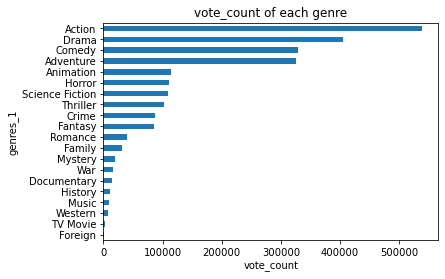

In [68]:
# vote count based on movies genres
df.groupby(['genres_1'])['vote_count'].sum().sort_values(ascending=True).plot.barh(x='genres_1',y='vote_count')
plt.xlabel('vote_count')
plt.title('vote_count of each genre')

### we conclude from the previous chart that action movies, drama movies, comedy movies & adventure movies are the top 4 genres having votes through the entire period 

<a id='conclusions'></a>
## Conclusion

### 1- 2014 had the highest number of movies which was 700 movies
### 2- both budget and revenues has increased throughout the period, however, revenues had more significantly increase compared to budget
### 3- the shortest runtime movies are (Fresh Guacamole,Cousin Ben Troop Screening,The Adventures of AndrÃ© and Wally B.,Luxo Jr.,Bambi Meets Godzilla)
### 4- the longest runtime movie is (The Story of Film: An Odyssey)
### 5- the most popular movies are (Jurassic world,Mad Max: Fury Road,intersteller,Guardians of the Galaxy,Insurgent)
### 6- the lowest budget movie is Fear clinic
### 7- the lowest revenue movie is Shattered Glass
### 8- the highest budget movie is The Warrior's Way
### 9- the highest revenue movie is Avatar
### 10- (action,drama,comedy & adventure) are the highest genres in terms of vote_counts
### 11- movies budget and revenues have a positive relationship that is not considered strong enough

## Limitations
### 1- We have used TMBD Movies dataset for our analysis and worked with popularity, revenue and runtime. Our analysis is limited to only the provided dataset. For example, the dataset does not confirm that every release of every director is listed.
### 2- There is no normalization or exchange rate or currency conversion is considered during this analysis and our analysis is limited to the numerical values of revenue.
### 3- Dropping missing or Null values from variables of our interest might skew our analysis and could show unintentional bias towards the relationship being analyzed.